# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K 

from tensorflow.keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0   

# train

In [10]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
model.fit(x_train
          , y_train
          , batch_size=256
          , epochs=13
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/13
196/196 [==============================] - 11s 25ms/step - loss: 1.9441 - accuracy: 0.3493 - val_loss: 2.7478 - val_accuracy: 0.1145
Epoch 2/13
196/196 [==============================] - 4s 23ms/step - loss: 1.2901 - accuracy: 0.5411 - val_loss: 1.8387 - val_accuracy: 0.3381
Epoch 3/13
196/196 [==============================] - 4s 23ms/step - loss: 1.1040 - accuracy: 0.6075 - val_loss: 1.3375 - val_accuracy: 0.5275
Epoch 4/13
196/196 [==============================] - 4s 23ms/step - loss: 0.9850 - accuracy: 0.6499 - val_loss: 1.0663 - val_accuracy: 0.6219
Epoch 5/13
196/196 [==============================] - 4s 23ms/step - loss: 0.8930 - accuracy: 0.6862 - val_loss: 0.9746 - val_accuracy: 0.6606
Epoch 6/13
196/196 [==============================] - 4s 23ms/step - loss: 0.8374 - accuracy: 0.7087 - val_loss: 0.9160 - val_accuracy: 0.6842
Epoch 7/13
196/196 [==============================] - 4s 23ms/step - loss: 0.7874 - accuracy: 0.7269 - val_loss: 0.8937 - val_accuracy: 0.686

In [12]:
model.layers[6].get_weights()

[]

# analysis

In [14]:
def my_eval(model, x_test, y_test, batch_size):
    ev = model.evaluate(x_test, y_test, batch_size)
    print("loss:", end = " ")
    print(ev[0])
    print("acc:", end = "")
    print(ev[1])
my_eval(model ,x_test, y_test, 1000)

10/10 [==============================] - 0s 26ms/step - loss: 0.9489 - accuracy: 0.6917
loss: 0.948900580406189
acc:0.6916999816894531


In [15]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

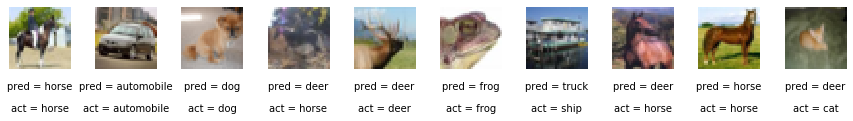

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)